In [63]:
from datetime import date, timedelta, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-v0_8-whitegrid")

est_price_path = './Data/est_prices.csv'
df = pd.read_csv(est_price_path, index_col=0)

#df = df[df['symbol'] == 'AAPL']
df_filtered = df[df.lastPrice > 10]
df_filtered = df_filtered[pd.to_datetime(df_filtered.lastTradeDate).dt.date >= date(2023,11,22)]
df_one = df_filtered[df_filtered.BS_perc_error >= 0.9]
#df_filtered.sort_values('BIN_perc_error')
df_filtered.sort_values('XGBr_perc_error')

,symbol,optionType,expiration,strike,lastPrice,lastTradeDate,inTheMoney,maturity,S0,sigma,...,BIN_est_price,BIN_perc_error,BS_est_price,BS_perc_error,MJD_est_price,MJD_perc_error,DTR_est_price,DTR_perc_error,XGBr_est_price,XGBr_perc_error
17178,^NDX,puts,2023-11-27,15860.0,12.10,2023-11-24,False,3,15982.009766,0.265122,...,NaN,NaN,44.520082,-2.679346,43.598927,-2.603217,34.45,-1.847107,160.807190,-12.289850
19748,^NDX,puts,2025-12-19,4000.0,26.40,2023-11-22,False,758,16001.389648,0.265225,...,NaN,NaN,0.000000,1.000000,0.000000,1.000000,40.70,-0.541667,211.459580,-7.009833
17214,^NDX,puts,2023-11-28,15750.0,11.55,2023-11-24,False,4,15982.009766,0.265122,...,NaN,NaN,27.985662,-1.423001,30.315665,-1.624733,15.75,-0.363636,77.861780,-5.741280
17216,^NDX,puts,2023-11-28,15775.0,12.25,2023-11-24,False,4,15982.009766,0.265122,...,NaN,NaN,33.064643,-1.699155,36.859445,-2.008934,24.60,-1.008163,77.861780,-5.356064
19684,^NDX,calls,2024-03-15,19000.0,17.00,2023-11-22,False,114,16001.389648,0.265225,...,NaN,NaN,31.028854,-0.825227,32.500813,-0.911813,18.60,-0.094118,104.254200,-5.132600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28962,^SPX,calls,2023-11-29,4570.0,10.70,2023-11-24,False,5,4559.339844,0.218662,...,NaN,NaN,20.596467,-0.924903,21.792126,-1.036647,8.83,0.174766,-42.088620,4.933516
28638,^SPX,calls,2023-11-27,4555.0,10.80,2023-11-24,True,3,4559.339844,0.218662,...,NaN,NaN,22.515158,-1.084737,22.759377,-1.107350,25.46,-1.357407,-42.526150,4.937606
29506,^SPX,calls,2023-12-04,4590.0,11.73,2023-11-24,False,10,4559.339844,0.218662,...,NaN,NaN,24.801241,-1.114343,24.425129,-1.082279,14.10,-0.202046,-48.210392,5.110008
29507,^SPX,calls,2023-12-04,4595.0,10.08,2023-11-24,False,10,4559.339844,0.218662,...,NaN,NaN,23.360371,-1.317497,23.029570,-1.284680,12.30,-0.220238,-48.210392,5.782777


In [64]:
import seaborn as sns
palette = sns.color_palette("tab20", 20)

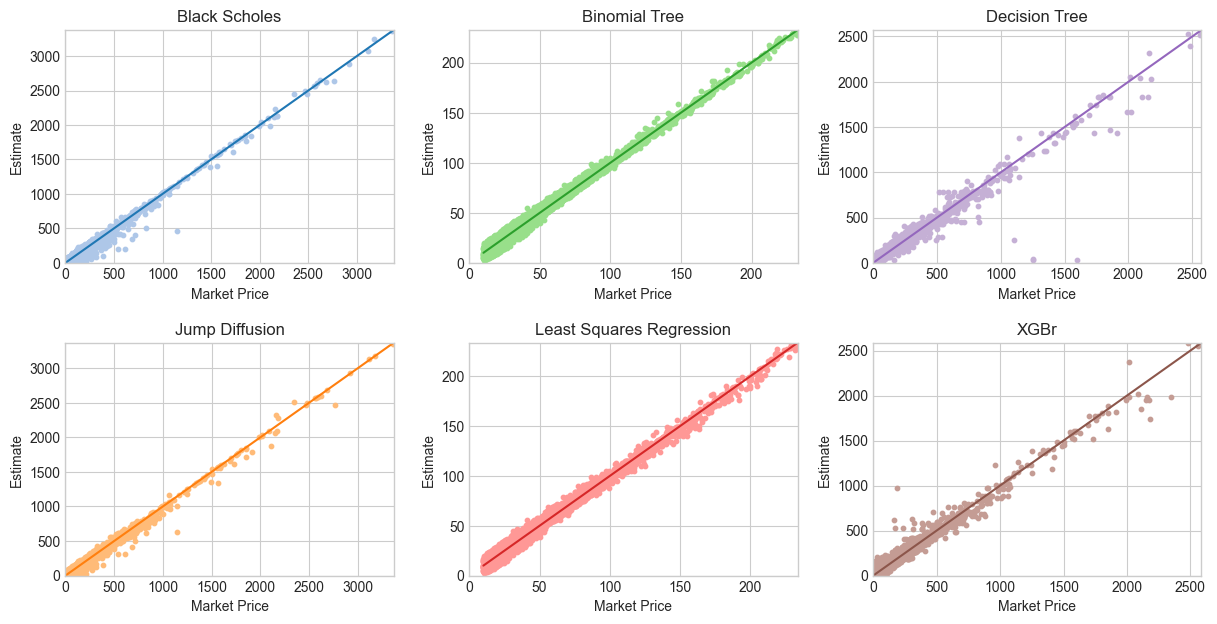

In [65]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
fig.tight_layout(h_pad=4, w_pad=3)
df_EU = df_filtered[df_filtered.method == 'E']
df_A = df_filtered[df_filtered.method == 'A']
x = np.linspace(min(df_EU.lastPrice), max(df_EU.lastPrice))
y = np.linspace(min(df_A.lastPrice), max(df_A.lastPrice))
z = np.linspace(min(df_filtered.lastPrice), max(df_filtered.lastPrice))

# BS plot
axis[0,0].scatter(df_EU.lastPrice, df_EU.BS_est_price, color = palette[1], s=10)
axis[0,0].plot(x,x, color = palette[0])
axis[0,0].set_ylabel("Estimate") 
axis[0,0].set_xlabel("Market Price") 
axis[0,0].set_title("Black Scholes")
axis[0,0].set_ylim(0, np.quantile(df_EU.BS_est_price, 0.998))
axis[0,0].set_xlim(0, np.quantile(df_EU.BS_est_price, 0.998))

# JD plot
axis[1,0].scatter(df_EU.lastPrice, df_EU.MJD_est_price, color = palette[3], s=10)
axis[1,0].plot(x,x, color = palette[2])
axis[1,0].set_ylabel("Estimate") 
axis[1,0].set_xlabel("Market Price") 
axis[1,0].set_title("Jump Diffusion") 
axis[1,0].set_ylim(0, top = np.quantile(df_EU.MJD_est_price, 0.998))
axis[1,0].set_xlim(0, right = np.quantile(df_EU.MJD_est_price, 0.998))

# BIN plot
axis[0,1].scatter(df_A.lastPrice, df_A.BIN_est_price, color = palette[5], s=10)
axis[0,1].plot(y,y, color = palette[4])
axis[0,1].set_ylabel("Estimate") 
axis[0,1].set_xlabel("Market Price") 
axis[0,1].set_title("Binomial Tree") 
axis[0,1].set_ylim(0, np.quantile(df_A.BIN_est_price, 0.99))
axis[0,1].set_xlim(0, np.quantile(df_A.BIN_est_price, 0.99))

# LSMC plot
axis[1,1].scatter(df_A.lastPrice, df_A.LSMC_est_price, color = palette[7], s=10)
axis[1,1].plot(y,y,color = palette[6])
axis[1,1].set_ylabel("Estimate") 
axis[1,1].set_xlabel("Market Price") 
axis[1,1].set_title("Least Squares Regression") 
axis[1,1].set_ylim(0, np.quantile(df_A.LSMC_est_price, 0.99))
axis[1,1].set_xlim(0, np.quantile(df_A.LSMC_est_price, 0.99))

# DTR plot
axis[0,2].scatter(df_filtered.lastPrice, df_filtered.DTR_est_price, color = palette[9], s=10)
axis[0,2].plot(z,z, color = palette[8])
axis[0,2].set_ylabel("Estimate") 
axis[0,2].set_xlabel("Market Price") 
axis[0,2].set_title("Decision Tree")
axis[0,2].set_ylim(0, np.quantile(df_filtered.DTR_est_price, 0.998))
axis[0,2].set_xlim(0, np.quantile(df_filtered.DTR_est_price, 0.998))

# XGBr plot
axis[1,2].scatter(df_filtered.lastPrice, df_filtered.XGBr_est_price, color = palette[11], s=10)
axis[1,2].plot(z,z, color = palette[10])
axis[1,2].set_ylabel("Estimate") 
axis[1,2].set_xlabel("Market Price") 
axis[1,2].set_title("XGBr") 
axis[1,2].set_ylim(0, top = np.quantile(df_filtered.XGBr_est_price, 0.998))
axis[1,2].set_xlim(0, right = np.quantile(df_filtered.XGBr_est_price, 0.998)) 

fig.savefig('./Presentation files/Model_predictions.png', dpi = 300,bbox_inches='tight')

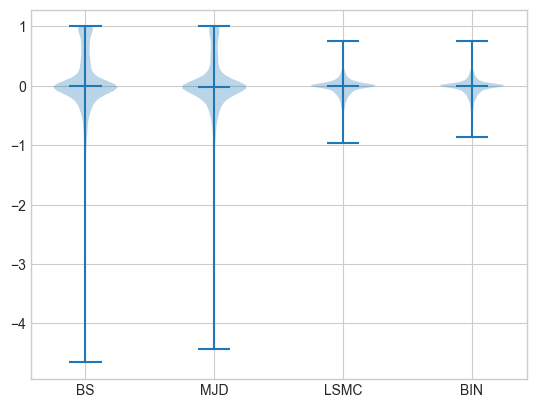

,Average,MSE,Std Dev
BS,0.0664,0.2289,0.4738
MJD,0.0211,0.1910,0.4365
LSMC,-0.0215,0.0254,0.1580
BIN,-0.0196,0.0242,0.1545
DTR,-0.0307,0.0334,0.1802
XGBr,-0.0009,0.4305,0.6561


In [66]:
import dataframe_image as dfi

dataset_errors = [df_EU.BS_perc_error, df_EU.MJD_perc_error,df_A.LSMC_perc_error,
            df_A.BIN_perc_error ,df_filtered.DTR_perc_error,df_filtered.XGBr_perc_error]
labels = ['BS','MJD','LSMC','BIN' ,'DTR','XGBr'] 

plt.violinplot(dataset_errors[:-2], showmedians= True)
plt.xticks(np.arange(1, len(labels[:-2]) + 1), labels=labels[:-2])
plt.savefig('./Presentation files/Violinplot_errors.png')
plt.show()

mean = []
mse = []
sd = []
for i in dataset_errors:
    mean.append(np.mean(i))
    mse.append(np.mean(i**2))
    sd.append(np.std(i))
summary = pd.DataFrame(np.transpose([mean,mse,sd]), columns=['Average', 'MSE', 'Std Dev'], index=labels)

dfi.export(summary.round(decimals=4), './Presentation files/Summary_errors.png', dpi = 300)
display(summary.round(decimals=4))

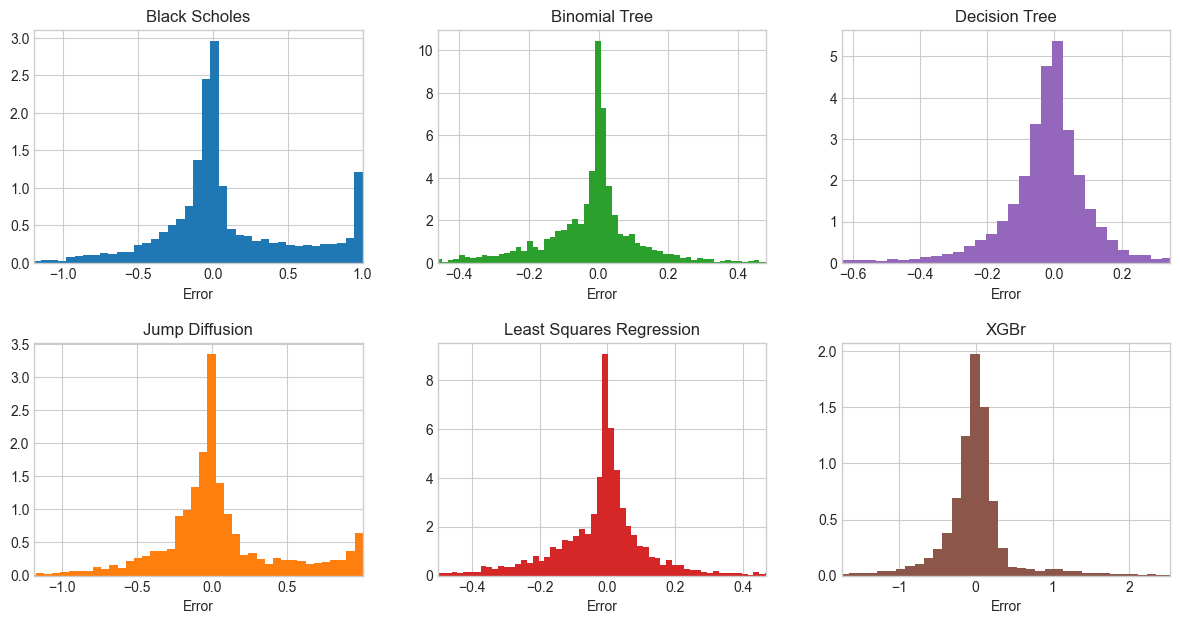

In [67]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
fig.tight_layout(h_pad=4, w_pad=3)
df_EU = df_filtered[df_filtered.method == 'E']
df_A = df_filtered[df_filtered.method == 'A']
x = np.linspace(min(df_EU.lastPrice), max(df_EU.lastPrice))
y = np.linspace(min(df_A.lastPrice), max(df_A.lastPrice))
z = np.linspace(min(df_filtered.lastPrice), max(df_filtered.lastPrice))
quantiles = [0.01, 0.99]

# BS plot
axis[0,0].hist(df_filtered.BS_perc_error, bins=100, density=True, color = palette[0])
axis[0,0].set_xlabel("Error") 
axis[0,0].set_title("Black Scholes")
axis[0,0].set_xlim(np.quantile(df_filtered.BS_perc_error.dropna(), quantiles[0]), np.quantile(df_filtered.BS_perc_error.dropna(), quantiles[1]))

# JD plot
axis[1,0].hist(df_filtered.MJD_perc_error, bins=100, density = True, color = palette[2])
axis[1,0].set_xlabel("Error") 
axis[1,0].set_title("Jump Diffusion") 
axis[1,0].set_xlim(np.quantile(df_filtered.MJD_perc_error.dropna(), quantiles[0]), np.quantile(df_filtered.MJD_perc_error.dropna(), quantiles[1]))

# BIN plot
axis[0,1].hist(df_filtered.BIN_perc_error, bins=100, density=True, color = palette[4])
axis[0,1].set_xlabel("Error") 
axis[0,1].set_title("Binomial Tree")
axis[0,1].set_xlim(np.quantile(df_filtered.BIN_perc_error.dropna(), quantiles[0]), np.quantile(df_filtered.BIN_perc_error.dropna(), quantiles[1]))

# LSMC plot
axis[1,1].hist(df_filtered.LSMC_perc_error, bins=100, density=True, color = palette[6])
axis[1,1].set_xlabel("Error") 
axis[1,1].set_title("Least Squares Regression") 
axis[1,1].set_xlim(np.quantile(df_filtered.LSMC_perc_error.dropna(), quantiles[0]), np.quantile(df_filtered.LSMC_perc_error.dropna(), quantiles[1]))

# DTR plot
axis[0,2].hist(df_filtered.DTR_perc_error, bins=150, density=True, color = palette[8])
axis[0,2].set_xlabel("Error") 
axis[0,2].set_title("Decision Tree")
axis[0,2].set_xlim(np.quantile(df_filtered.DTR_perc_error.dropna(), quantiles[0]), np.quantile(df_filtered.DTR_perc_error.dropna(), quantiles[1]))

# XGBr plot
axis[1,2].hist(df_filtered.XGBr_perc_error, bins=150, density=True, color = palette[10])
axis[1,2].set_xlabel("Error") 
axis[1,2].set_title("XGBr") 
axis[1,2].set_xlim(np.quantile(df_filtered.XGBr_perc_error.dropna(), quantiles[0]), np.quantile(df_filtered.XGBr_perc_error.dropna(), quantiles[1]))

fig.savefig('./Presentation files/Model_errors.png', dpi = 300,bbox_inches='tight')

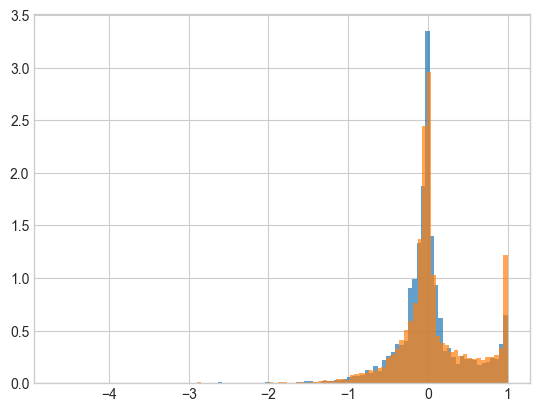

0.22889066962641247 0.1909567330466337


In [68]:
plt.hist(df_filtered.MJD_perc_error, bins=100, density = True, alpha = 0.7)
plt.hist(df_filtered.BS_perc_error, bins=100, density = True, alpha = 0.7)
#plt.hist(BIN_error, bins=100)
plt.show()
mseBS = np.mean((df_filtered.BS_perc_error)**2)
mseMJD = np.mean((df_filtered.MJD_perc_error)**2)
print(mseBS, mseMJD)